# Analyzing the House prices in King County, Washington

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Regression analysis. The dataset consisted of historic data of houses sold between May 2014 to May 2015.

In [1]:
# importing the necessary libraries and the dataset "kc_house_data"
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv') 
df.info()

FileNotFoundError: [Errno 2] File b'kc_house_data.csv' does not exist: b'kc_house_data.csv'

In [ ]:
df.describe()

In [3]:
df.head()

,Year_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,Renovation,lat,long,sqft_living15,sqft_lot15
0,2014,500000.0,4,2.00,1680.0,3813.0,2.0,0,0,4,7,1680.0,0.0,1900,not renovated,47.5930,-122.293,2540,3996
1,2014,500000.0,2,1.00,960.0,5000.0,1.0,0,0,4,7,960.0,0.0,1900,not renovated,47.6755,-122.367,1330,5000
2,2014,554600.0,3,1.75,1470.0,5000.0,1.5,0,0,5,7,1470.0,0.0,1900,not renovated,47.6755,-122.369,1530,5000
3,2015,730000.0,3,1.75,1650.0,5000.0,1.5,0,0,4,8,1650.0,0.0,1900,not renovated,47.6743,-122.371,1630,5000
4,2014,870000.0,5,4.00,3400.0,5000.0,2.0,0,0,3,8,2320.0,1080.0,1900,renovated,47.6655,-122.363,1910,5000


In [4]:
pd.isnull(df).any()

Year_sold        False
price            False
bedrooms         False
bathrooms         True
sqft_living       True
sqft_lot          True
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement     True
yr_built         False
Renovation       False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
#Imputing the missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df['sqft_above'] = imputer.fit_transform(df[['sqft_above']])
df['bathrooms'] = imputer.fit_transform(df[['bathrooms']])
df['sqft_living'] = imputer.fit_transform(df[['sqft_living']])
df['sqft_lot'] = imputer.fit_transform(df[['sqft_lot']])
df['sqft_basement'] = imputer.fit_transform(df[['sqft_basement']])

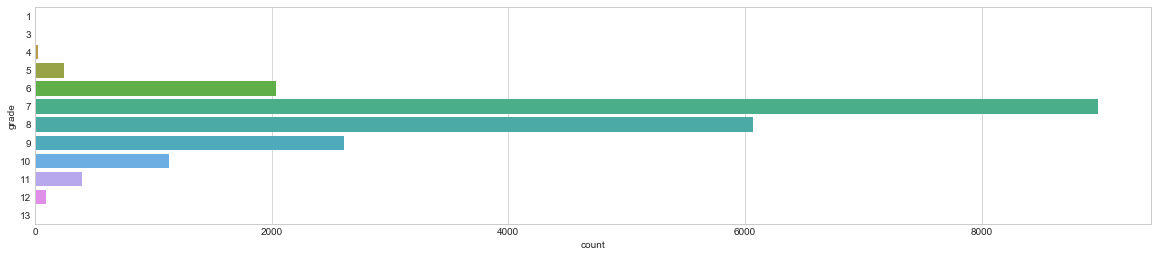

In [6]:
#distribution the field grade
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="grade", data=df)


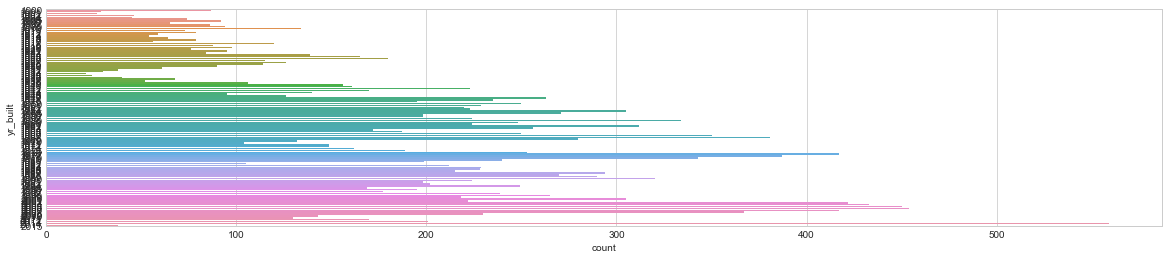

In [7]:
# distribution of the yr_built field
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="yr_built", data=df)

In [8]:
df.head()

,Year_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,Renovation,lat,long,sqft_living15,sqft_lot15
0,2014,500000.0,4,2.00,1680.0,3813.0,2.0,0,0,4,7,1680.0,0.0,1900,not renovated,47.5930,-122.293,2540,3996
1,2014,500000.0,2,1.00,960.0,5000.0,1.0,0,0,4,7,960.0,0.0,1900,not renovated,47.6755,-122.367,1330,5000
2,2014,554600.0,3,1.75,1470.0,5000.0,1.5,0,0,5,7,1470.0,0.0,1900,not renovated,47.6755,-122.369,1530,5000
3,2015,730000.0,3,1.75,1650.0,5000.0,1.5,0,0,4,8,1650.0,0.0,1900,not renovated,47.6743,-122.371,1630,5000
4,2014,870000.0,5,4.00,3400.0,5000.0,2.0,0,0,3,8,2320.0,1080.0,1900,renovated,47.6655,-122.363,1910,5000


In [9]:
# Bucketing the rows into different classes of grades
grade_1_to_6 = [1,2,3,4,5,6]
grade_9_to_13 = [9,10,11,12,13]

#replace elements in list.
df['grade'].replace(to_replace = grade_1_to_6 ,value = '1 - 6',inplace = True)
df['grade'].replace(to_replace = grade_9_to_13,value = '9 - 13',inplace = True)
df['grade'].value_counts()


7         8981
8         6068
9 - 13    4251
1 - 6     2313
Name: grade, dtype: int64

In [10]:
# bucketing the rows to new range of yr_built
yr_1900_to_1950 = [1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,
                1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,
                1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950]
yr_1950_to_1990 = [1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
yr_1990_to_2015 = [1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

#replace elements in list.
df['yr_built'].replace(to_replace = yr_1900_to_1950 ,value = 'between 1900 to 1950',inplace = True)
df['yr_built'].replace(to_replace = yr_1950_to_1990,value = 'between 1950 to 1990',inplace = True)
df['yr_built'].replace(to_replace = yr_1990_to_2015,value = 'between 1990 to 2015',inplace = True)
df['yr_built'].value_counts()


between 1950 to 1990    9749
between 1990 to 2015    6677
between 1900 to 1950    5187
Name: yr_built, dtype: int64

In [11]:
# converting the categorical values to the data type of object
df['Year_sold'] = df['Year_sold'].astype(object)
df['waterfront'] = df['waterfront'].astype(object)
df['view'] = df['view'].astype(object)
df['condition'] = df['condition'].astype(object)

In [12]:
df['price'] = df['price'].astype(int)


In [13]:
#Re-Separating the Numerical and Categorical Columns
cat_column_new = df.dtypes[df.dtypes == 'object']
num_column_new = df.dtypes[df.dtypes != 'object']
num_column_new


price              int32
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
sqft_above       float64
sqft_basement    float64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
cat_column_new

Year_sold     object
waterfront    object
view          object
condition     object
grade         object
yr_built      object
Renovation    object
dtype: object

In [15]:
# creating dummy variables for the categorical values
df = pd.get_dummies(df, columns = ['Year_sold'], prefix = ['Year_sold'])
df = pd.get_dummies(df, columns = ['waterfront'], prefix = ['waterfront'])
df = pd.get_dummies(df, columns = ['view'], prefix = ['view'])
df = pd.get_dummies(df, columns = ['condition'], prefix = ['condition'])
df = pd.get_dummies(df, columns = ['grade'], prefix = ['grade'])
df = pd.get_dummies(df, columns = ['yr_built'], prefix = ['yr_built'])
df = pd.get_dummies(df, columns = ['Renovation'], prefix = ['Renovation'])


In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,condition_5,grade_7,grade_8,grade_1 - 6,grade_9 - 13,yr_built_between 1900 to 1950,yr_built_between 1950 to 1990,yr_built_between 1990 to 2015,Renovation_not renovated,Renovation_renovated
0,500000,4,2.00,1680.0,3813.0,2.0,1680.0,0.0,47.5930,-122.293,...,0,1,0,0,0,1,0,0,1,0
1,500000,2,1.00,960.0,5000.0,1.0,960.0,0.0,47.6755,-122.367,...,0,1,0,0,0,1,0,0,1,0
2,554600,3,1.75,1470.0,5000.0,1.5,1470.0,0.0,47.6755,-122.369,...,1,1,0,0,0,1,0,0,1,0
3,730000,3,1.75,1650.0,5000.0,1.5,1650.0,0.0,47.6743,-122.371,...,0,0,1,0,0,1,0,0,1,0
4,870000,5,4.00,3400.0,5000.0,2.0,2320.0,1080.0,47.6655,-122.363,...,0,0,1,0,0,1,0,0,0,1


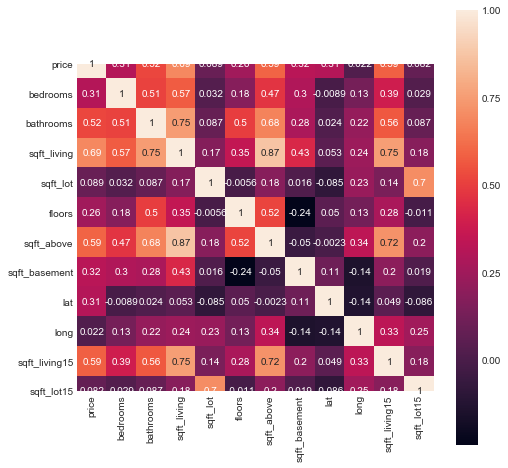

In [17]:
# correlation matrix for the features
fig = plt.figure(figsize = (8,8))

sns.heatmap(df[list(num_column_new.index)].corr(),annot = True,square = True);
                   

In [18]:
# Creating Feature and target variable

y = df['price']
X = df.drop(['price'], axis = 1)
names = list(X.columns.values)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 35 columns):
price                            21613 non-null int32
bedrooms                         21613 non-null int64
bathrooms                        21613 non-null float64
sqft_living                      21613 non-null float64
sqft_lot                         21613 non-null float64
floors                           21613 non-null float64
sqft_above                       21613 non-null float64
sqft_basement                    21613 non-null float64
lat                              21613 non-null float64
long                             21613 non-null float64
sqft_living15                    21613 non-null int64
sqft_lot15                       21613 non-null int64
Year_sold_2014                   21613 non-null uint8
Year_sold_2015                   21613 non-null uint8
waterfront_0                     21613 non-null uint8
waterfront_1                     21613 non-null uint8
view_0     

In [20]:
pd.isnull(df).any()

price                            False
bedrooms                         False
bathrooms                        False
sqft_living                      False
sqft_lot                         False
floors                           False
sqft_above                       False
sqft_basement                    False
lat                              False
long                             False
sqft_living15                    False
sqft_lot15                       False
Year_sold_2014                   False
Year_sold_2015                   False
waterfront_0                     False
waterfront_1                     False
view_0                           False
view_1                           False
view_2                           False
view_3                           False
view_4                           False
condition_1                      False
condition_2                      False
condition_3                      False
condition_4                      False
condition_5              

# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging

DecisionTree regressor

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

mf = [2, 5, 10]
n = [100, 200, 300, 500]
ms = [0.1, 0.5, 1]

param_grid = dict(max_features = mf, n_estimators = n, max_samples = ms)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
bag_rgr = GridSearchCV(BaggingRegressor(dt_rgr,  bootstrap=True, oob_score=True, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
bag_rgr.best_params_

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100}

In [23]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.7233
Test score: 0.6952


Linear regression

In [24]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

bag_rgr = GridSearchCV(BaggingRegressor(lreg,  bootstrap=True, oob_score=True, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
bag_rgr.best_params_

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100}

In [25]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.6038
Test score: 0.6243


# Pasting

Decisiontree Regressor

In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

mf = [2, 5, 10]
n = [100, 200, 300, 500]
ms = [0.1, 0.5, 1]

param_grid = dict(max_features = mf, n_estimators = n, max_samples = ms)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
bag_rgr = GridSearchCV(BaggingRegressor(dt_rgr,  bootstrap=False, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
bag_rgr.best_params_

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100}

In [27]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.7276
Test score: 0.6997


Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

bag_rgr = GridSearchCV(BaggingRegressor(lreg,  bootstrap=False, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
bag_rgr.best_params_

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100}

In [29]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.6028
Test score: 0.6234


# Adaboost Boosting

DecisionTree Regressor

In [30]:
from sklearn.ensemble import AdaBoostRegressor


n = [100, 200, 300, 500]
lr = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n, learning_rate = lr)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
ada_rgr = GridSearchCV(AdaBoostRegressor(dt_rgr, random_state=0), param_grid, cv = 5, iid = False)
ada_rgr.fit(X_train, y_train)
y_pred = ada_rgr.predict(X_test)
ada_rgr.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [31]:
print('Train score: {:.4f}'.format(ada_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_rgr.score(X_test, y_test)))

Train score: 0.8321
Test score: 0.7774


Linear regression 

In [32]:
n = [100, 200, 300, 500]
lr = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n, learning_rate = lr)

ada_rgr = GridSearchCV(AdaBoostRegressor(lreg, random_state=0),  param_grid, cv = 5, iid = False)
ada_rgr.fit(X_train, y_train)
y_pred = ada_rgr.predict(X_test)
ada_rgr.best_params_

Train score: 0.2838
Test score: 0.2273


In [ ]:
print('Train score: {:.4f}'.format(ada_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_rgr.score(X_test, y_test)))

# Gradient boosting

In [33]:
from  sklearn.ensemble import GradientBoostingRegressor

mf = [2, 5, 10]
n = [50, 100, 200]
md = [1, 5, 10]

param_grid = dict(max_features = mf, n_estimators = n, max_depth = md)

gbrt = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv = 5, iid = False)

gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
gbrt.best_params_

{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}

In [34]:
print('Train score: {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.9521
Test score: 0.8871


# Principal Component Analysis

Creating a new dataset after reducing the dimensions using PCA

In [35]:
from sklearn.decomposition import PCA
#import numpy as np

pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

pca.n_components_
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.95) + 1

12

# LINEAR REGRESSION

Without PCA

In [36]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.6678770388671587
0.6856276569690731


With PCA

In [37]:
lreg.fit(X_train_reduced, y_train)
print(lreg.score(X_train_reduced, y_train))
print(lreg.score(X_test_reduced, y_test))

0.5425256514742294
0.5817095750082382


# POLYNOMIAL REGRESSION

Without PCA

In [38]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [39]:
print(train_score_list)
print(test_score_list)

[0.6685105014847466, 0.8197186255949839]
[0.6861638174849726, -9.054636609747665e+19]


With PCA

In [40]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [41]:
print(train_score_list)
print(test_score_list)

[0.5425256514742294, 0.7057966675590055]
[0.5817095750082382, 0.7159184704729091]


# Ridge

Without PCA

In [97]:
from  sklearn.linear_model import Ridge

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

ridge_reg = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1, cv = 5, iid = False)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
ridge_reg.best_params_


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.4s finished


{'alpha': 0.1}

In [98]:
print('Train score: {:.4f}'.format(ridge_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge_reg.score(X_test, y_test)))

Train score: 0.6686
Test score: 0.6871


Text(0.5, 0, '$\\alpha$')

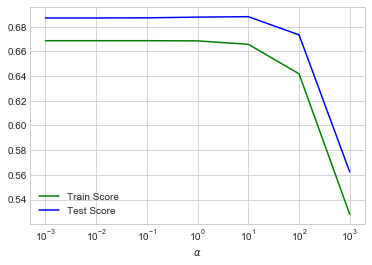

In [102]:
#variation of test and train score with alpha

train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

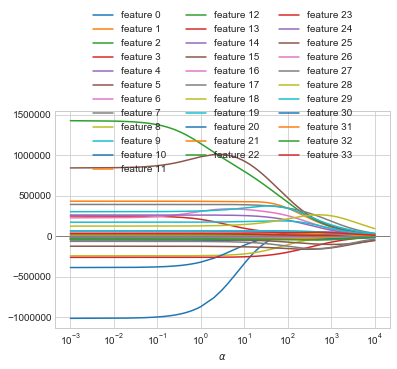

In [111]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,34):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

With PCA

In [104]:
ridge_reg.fit(X_train_reduced,y_train)

y_pred = ridge_reg.predict(X_test_reduced)
ridge_reg.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    3.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.6s finished


{'alpha': 1}

In [105]:
print('Train score: {:.4f}'.format(ridge_reg.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge_reg.score(X_test_reduced, y_test)))

Train score: 0.5425
Test score: 0.5817


Text(0.5, 0, '$\\alpha$')

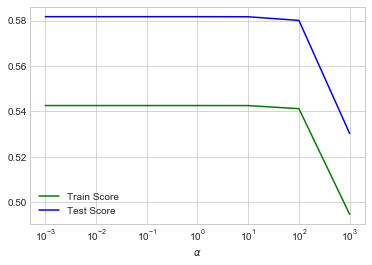

In [106]:
#variation of test and train score with alpha

train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

IndexError: index 12 is out of bounds for axis 1 with size 12

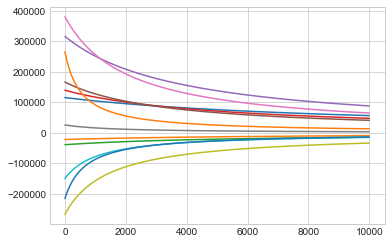

In [112]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,34):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=19999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso

Without PCA

In [113]:
from  sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

lasso_reg = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1, cv = 5, iid = False)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
lasso_reg.best_params_


C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56477566044876.375, tolerance: 223712019258.84488
  positive)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   15.6s finished
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56476609666845.31, tolerance: 223712019258.84488
  positive)


{'alpha': 0.001}

In [114]:
print('Train score: {:.4f}'.format(lasso_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso_reg.score(X_test, y_test)))

Train score: 0.6686
Test score: 0.6870


C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56476609666845.31, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56477566044876.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56482174306616.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2164

Text(0.5, 0, '$\\alpha$')

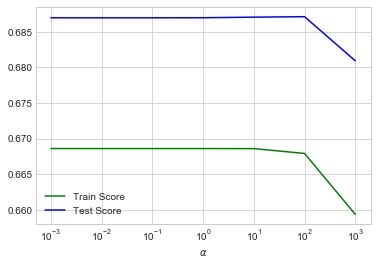

In [115]:
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56476609666845.31, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56476937925981.31, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56477081262126.19, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56477

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56478771270257.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56478822454316.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56478873608156.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56478

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56480400673095.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56480451430326.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56480502176799.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56480

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56482022464489.94, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56482073080983.5, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56482123696649.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564821

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56483640707088.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56483691232884.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56483741752135.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56485256238682.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56485306682424.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56485357123379.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56485

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56486818958475.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56486869330570.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56486919702319.75, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5648

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56488429809693.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56488480112646.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56488530413121.56, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5648

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56490038409710.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56490088642670.75, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56490138872887.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5649

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56491644789626.75, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56491694953569.19, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56491745115843.19, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56491

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56493248970732.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56493299066521.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56493349159759.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56493

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56494850968110.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56494900994599.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56494951019967.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56496450787669.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56496500746916.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56496550704424.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56496

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56498048436359.94, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56498098328200.75, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56498148217780.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5649

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56499643919662.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56499693743426.81, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56499743564991.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5649

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56501237239176.5, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56501286996051.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56501336749682.31, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56501

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56502828398435.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56502878087555.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56502927774992.5, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565029

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56504417399284.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56504467020622.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56504516640243.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56506004242122.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56506053795854.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56506103348530.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56506

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56507588929417.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56507638415750.06, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56507687900550.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5650

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56509171460685.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56509220879947.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56509270297067.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56510751837104.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56510801189432.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56510850539475.56, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5651

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56512330060363.81, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56512379344450.69, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56512428627022.44, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56512

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2248748091753.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2199384597724.5, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2168622817091.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21548960

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2160746663309.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2160762908153.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2160779089244.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216079520

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161240435394.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161255291136.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161270120458.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161284

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161705402974.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161719687940.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161733961338.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21617482

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162157998088.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162172023830.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162186043880.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21622

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162604617045.75, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162618509419.625, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162632398810.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216264

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163047957439.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163061770193.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163075580712.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216308

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163489201323.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163502958199.25, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163516713716.875, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216353

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163928874117.0, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163942602151.375, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163956320274.125, tolerance: 223712019258.84488
  positive)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2163970

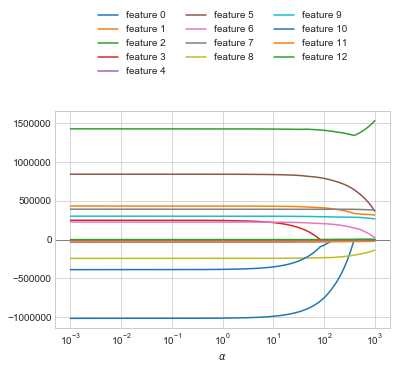

In [116]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

With PCA

In [117]:
lasso_reg.fit(X_train_reduced, y_train)

y_pred = lasso_reg.predict(X_test_reduced)
lasso_reg.best_params_


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    4.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.4s finished


{'alpha': 10}

In [118]:
print('Train score: {:.4f}'.format(lasso_reg.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(lasso_reg.score(X_test_reduced, y_test)))

Train score: 0.5425
Test score: 0.5817


Text(0.5, 0, '$\\alpha$')

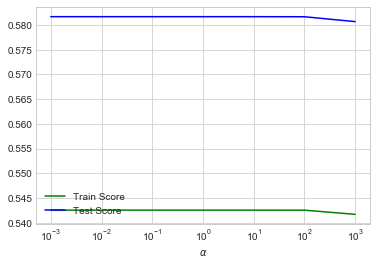

In [121]:
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

IndexError: index 12 is out of bounds for axis 1 with size 12

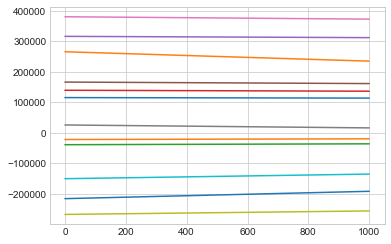

In [122]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# KNN Regressor

Without PCA

In [83]:
from sklearn.neighbors import KNeighborsRegressor

n = [3,5,11,19]

param_grid = dict(n_neighbors=n)

knn=GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, iid = False)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.best_params_


{'n_neighbors': 5}

In [81]:
print('Train score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8213
Test score: 0.7145


With PCA

In [84]:
knn.fit(X_train_reduced,y_train)

y_pred = knn.predict(X_test_reduced)
knn.best_params_


{'n_neighbors': 5}

In [85]:
print('Train score: {:.4f}'.format(knn.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

Train score: 0.7970
Test score: 0.6903


# SVM Regressor

Without PCA

In [95]:
from sklearn.svm import SVR

C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear','poly','rbf']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVR(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
SVM.best_params_


{'C': 100, 'kernel': 'linear'}

In [96]:
print('Train score: {:.4f}'.format(SVM.score(X_train,y_train)))
print('Test score: {:.4f}'.format(SVM.score(X_test, y_test)))

Train score: 0.3294
Test score: 0.3571


With PCA

In [126]:
SVM.fit(X_train_reduced,y_train)

y_pred = SVM.predict(X_test_reduced)
SVM.best_params_

{'C': 100, 'kernel': 'linear'}

In [127]:
print('Train score: {:.4f}'.format(SVM.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(SVM.score(X_test_reduced, y_test)))

Train score: 0.3212
Test score: 0.3487


# Linear SVR


Without PCA

In [123]:
from sklearn.svm import SVR, LinearSVR

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(C=C)

linearsvr=GridSearchCV(SVR(), param_grid, cv = 5, iid = False)

linearsvr.fit(X_train,y_train)
y_pred = linearsvr.predict(X_test)
linearsvr.best_params_

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

{'C': 100}

In [124]:
print('Train score: {:.4f}'.format(linearsvr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linearsvr.score(X_test, y_test)))

Train score: -0.0119
Test score: -0.0118


With PCA

In [128]:
linearsvr.fit(X_train_reduced,y_train)
y_pred = linearsvr.predict(X_test_reduced)
linearsvr.best_params_

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ANU\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

{'C': 100}

In [131]:
print('Train score: {:.4f}'.format(linearsvr.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(linearsvr.score(X_test_reduced, y_test)))

Train score: 0.0333
Test score: 0.0365


# Neural Networks

In [86]:

import keras as k

Using TensorFlow backend.


In [87]:
from keras.models import Sequential
from keras.layers import Dense


In [88]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [89]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
# Fit the model
model.fit(X_train, y_train, epochs= 150, batch_size=20)

Epoch 1/150
16209/16209 [==============================] - 1s 48us/step - loss: -8289265.2823 - accuracy: 0.0000e+00
Epoch 2/150
16209/16209 [==============================] - 1s 40us/step - loss: -8289265.2964 - accuracy: 0.0000e+00
Epoch 3/150
16209/16209 [==============================] - 1s 40us/step - loss: -8289265.2784 - accuracy: 0.0000e+00
Epoch 4/150
16209/16209 [==============================] - 1s 41us/step - loss: -8289265.2775 - accuracy: 0.0000e+00
Epoch 5/150
16209/16209 [==============================] - 1s 44us/step - loss: -8289265.2695 - accuracy: 0.0000e+00
Epoch 6/150
16209/16209 [==============================] - 1s 40us/step - loss: -8289265.2709 - accuracy: 0.0000e+00
Epoch 7/150
16209/16209 [==============================] - 1s 40us/step - loss: -8289265.3047 - accuracy: 0.0000e+00
Epoch 8/150
16209/16209 [==============================] - 1s 42us/step - loss: -8289265.2943 - accuracy: 0.0000e+00
Epoch 9/150
16209/16209 [==============================] - 1s 41

16209/16209 [==============================] - 1s 51us/step - loss: -8289265.2857 - accuracy: 0.0000e+00
Epoch 140/150
16209/16209 [==============================] - 1s 49us/step - loss: -8289265.2630 - accuracy: 0.0000e+00
Epoch 141/150
16209/16209 [==============================] - 1s 51us/step - loss: -8289265.2709 - accuracy: 0.0000e+00
Epoch 142/150
16209/16209 [==============================] - 1s 49us/step - loss: -8289265.2874 - accuracy: 0.0000e+00
Epoch 143/150
16209/16209 [==============================] - 1s 51us/step - loss: -8289265.2762 - accuracy: 0.0000e+00
Epoch 144/150
16209/16209 [==============================] - 1s 50us/step - loss: -8289265.2831 - accuracy: 0.0000e+00
Epoch 145/150
16209/16209 [==============================] - 1s 49us/step - loss: -8289265.2656 - accuracy: 0.0000e+00
Epoch 146/150
16209/16209 [==============================] - 1s 51us/step - loss: -8289265.2731 - accuracy: 0.0000e+00
Epoch 147/150
16209/16209 [==============================] - 1

In [133]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5404/5404 [==============================] - 0s 15us/step

accuracy: 0.00%


In [134]:
y_predict = model.predict(X_test)
y_predict

array([[1.4745443],
       [1.4724836],
       [1.5420995],
       ...,
       [1.5677507],
       [1.3891742],
       [1.4346793]], dtype=float32)